/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


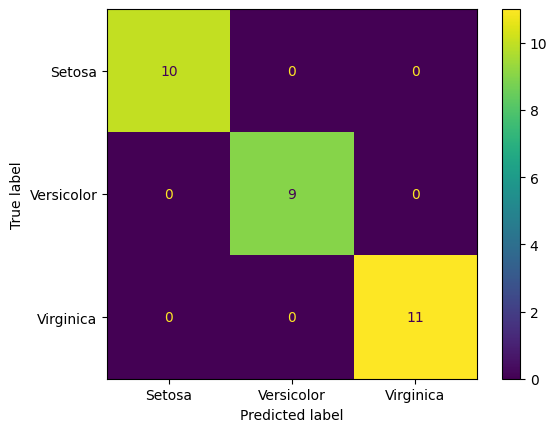

In [3]:
# -*- coding: utf-8 -*-


# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

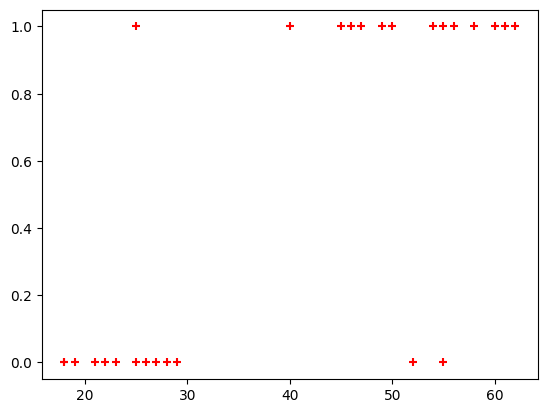

In [4]:
 # -*- coding: utf-8 -*-
"""LogisticRegression_Binary.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1M8PXdcmPsrQtqyVXpET3sgghAMr_MCg5
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

BINARY CLASSIFICATION

In [5]:
import pandas as pd

# Load the dataset
file_path = "HR_comma_sep.csv"  # Ensure the file is in the working directory
df = pd.read_csv(file_path)

# Display basic dataset information
print(df.info())  # Check for missing values and data types
print(df.describe())  # Summary statistics
print(df["left"].value_counts())  # Check retention distribution



df_encoded = df.copy()
df_encoded["salary"] = df_encoded["salary"].astype("category").cat.codes  # Encode salary as numbers
df_encoded = pd.get_dummies(df_encoded, columns=["Department"], drop_first=True)  # One-hot encode departments

correlation_matrix = df_encoded.corr()

print(correlation_matrix["left"].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

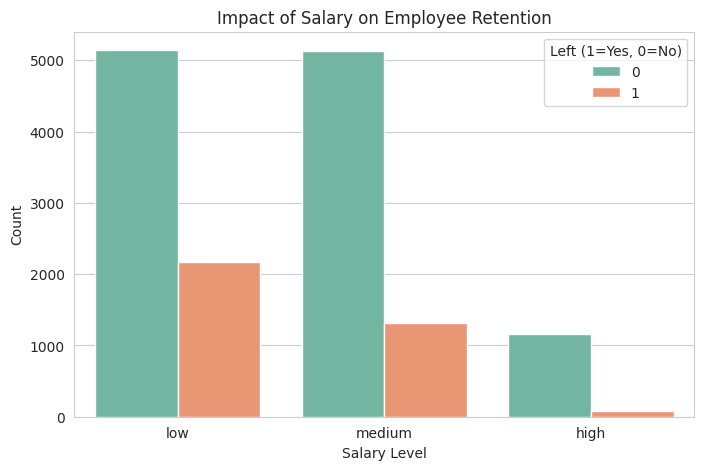

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Plot salary vs retention
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="salary", hue="left", palette="Set2")
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left (1=Yes, 0=No)")
plt.show()

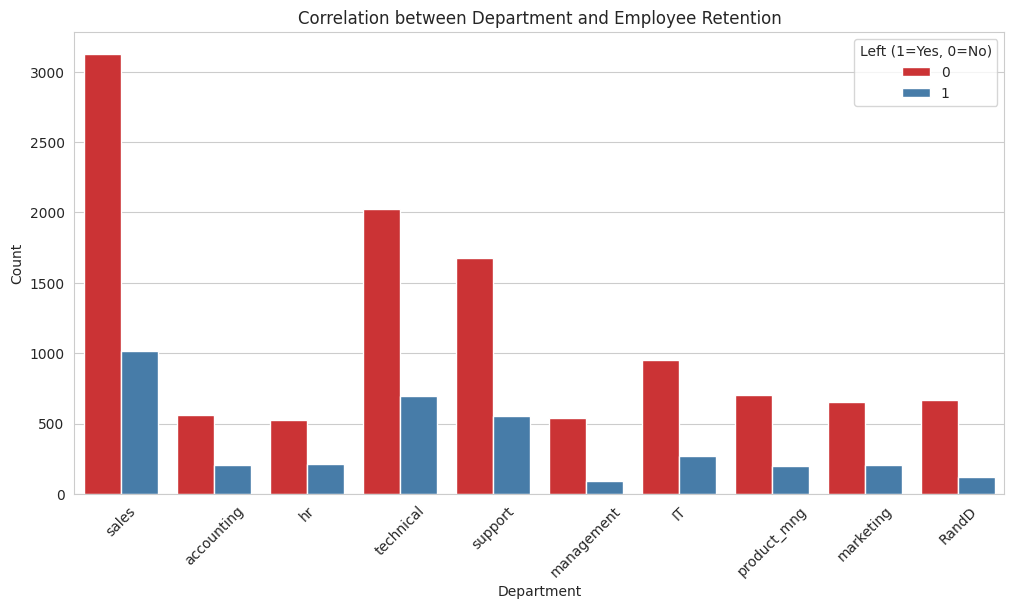

In [7]:
# Plot department vs retention
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Department", hue="left", palette="Set1")
plt.title("Correlation between Department and Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Left (1=Yes, 0=No)")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# Encode categorical variables
df_encoded = df.copy()
df_encoded["salary"] = LabelEncoder().fit_transform(df["salary"])  # Encode salary levels
df_encoded = pd.get_dummies(df_encoded, columns=["Department"], drop_first=True)  # One-hot encode departments

# Define features and target variable
X = df_encoded.drop(columns=["left"])  # Independent variables
y = df_encoded["left"]  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train.iloc[:, :7] = scaler.fit_transform(X_train.iloc[:, :7])
X_test.iloc[:, :7] = scaler.transform(X_test.iloc[:, :7])

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

<ipython-input-8-48321d2ade7b>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.65341156  0.15695385 -0.65341156 ...  0.96731926  0.15695385
 -1.46377697]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, :7] = scaler.fit_transform(X_train.iloc[:, :7])
<ipython-input-8-48321d2ade7b>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.2608872  -0.10065248 -0.52126862 ...  0.96090253  0.33999299
  0.36002233]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, :7] = scaler.fit_transform(X_train.iloc[:, :7])
<ipython-input-8-48321d2ade7b>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.34061666  1.02407141 -1.02629282 ... -1.02629282  1.02407141
  0.340616

Model Accuracy: 75.67%


MULTICLASS CLASSIFICATION

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 0.95


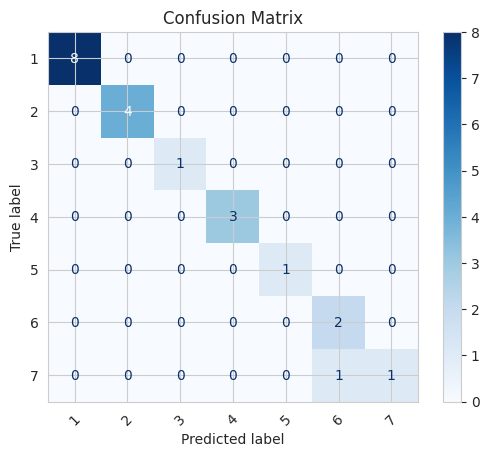

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load datasets
data = pd.read_csv("zoo-data.csv")

# Drop 'animal_name' as it's not needed for prediction
if 'animal_name' in data.columns:
    data = data.drop(columns=['animal_name'])

# Define features and target variable
X = data.drop(columns=['class_type'])
y = data['class_type']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build Logistic Regression Model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()
